In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Test_fCbTej3_0j1gHmj.csv')

In [6]:
X=[]
for i in data['filename']:
    path = 'Train_UQcUa52\\Images\\test\\'+str(i)
    img=cv2.imread(path)
    img=cv2.resize(img,(28,28))
    img=img / 255
    X.append(img)
X=np.array(X)

In [7]:
X.shape

(21000, 28, 28, 3)

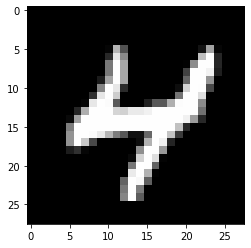

In [34]:
plt.imshow(X[0])

In [10]:
model = tf.keras.models.load_model('Digit_Identifier.model')

In [11]:
predictions=model.predict(X)

In [33]:
predictions[0]

array([4.4801697e-14, 1.1614854e-12, 9.1633591e-13, 7.1120566e-16,
       1.0000000e+00, 2.5738543e-14, 2.2892425e-10, 2.3178546e-13,
       9.7198485e-11, 8.4108651e-11], dtype=float32)

### 

In [41]:
pred=[]
for i in range(predictions.shape[0]):
   pred.append(np.where(predictions[i] == np.max(predictions[i]))[0][0])

In [43]:
pred = pd.DataFrame(pred,columns=['label'])

In [45]:
Output = data.join(pred)

In [49]:
Output.to_csv('mnist_output.csv')